# Generate Pareto frontier plots

TODO: We could consider doing some preprocessing on the dataframes, so that if the next result is worse, we just keep the preceding result. 

## Imports

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

## m=2, exp2

### Load in source data

In [11]:
parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_replenishment/pareto_frontier_plots/outputs/2024-03-07/12-47-55")

heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")
vi_df = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-11/18-32-58/vi_df.csv")

### Create figure

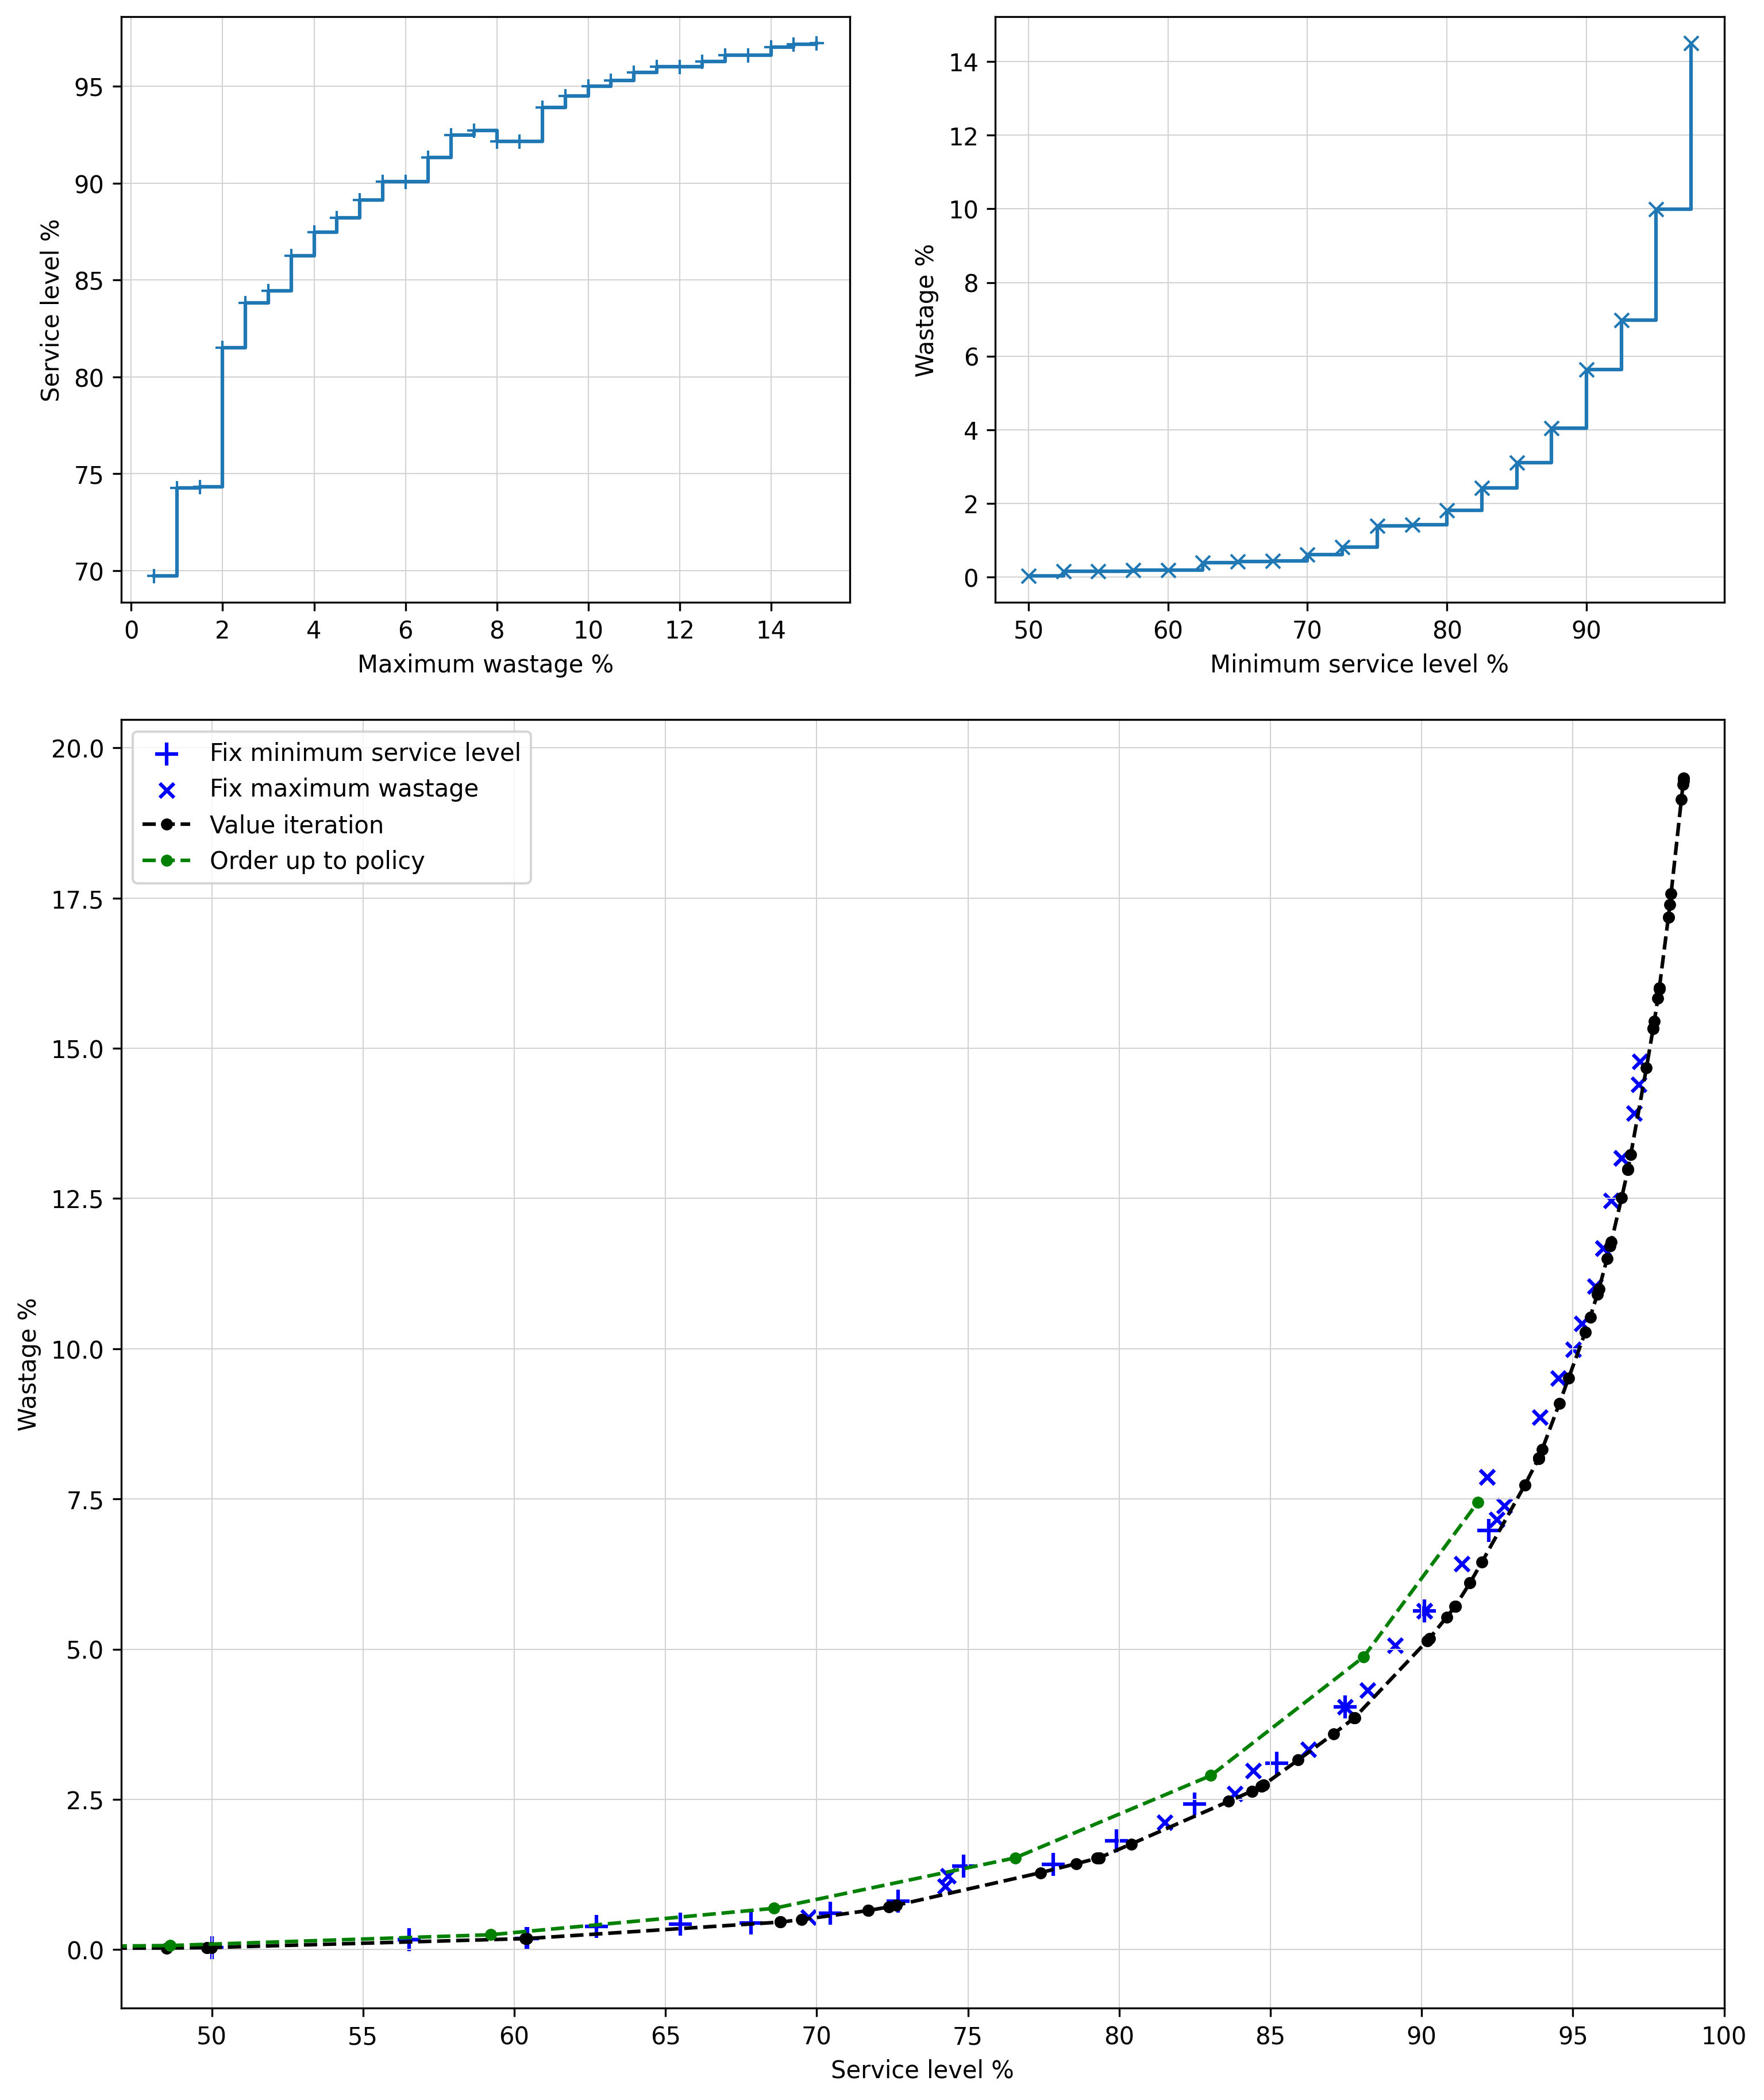

In [12]:
fig = plt.figure(figsize=(12, 15), dpi=300)
gs = GridSpec(3, 2, figure=fig)

# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
ax3.scatter(service_level_limit_df["top_1_service_level_%_mean"][:-2], service_level_limit_df["top_1_wastage_%_mean"][:-2], label="Fix minimum service level", marker="+", s=95, color='blue')
ax3.scatter(wastage_limit_df["top_1_service_level_%_mean"], wastage_limit_df["top_1_wastage_%_mean"], label="Fix maximum wastage", marker="x", color='blue')
ax3.plot(vi_df["service_level_%_mean"], vi_df["wastage_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
ax3.plot(heuristic_df["service_level_%_mean"], heuristic_df["wastage_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_xlabel("Service level %")
ax3.set_ylabel("Wastage %")
ax3.set_xlim(47,100)
ax3.set_xticks(np.arange(50, 105, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()

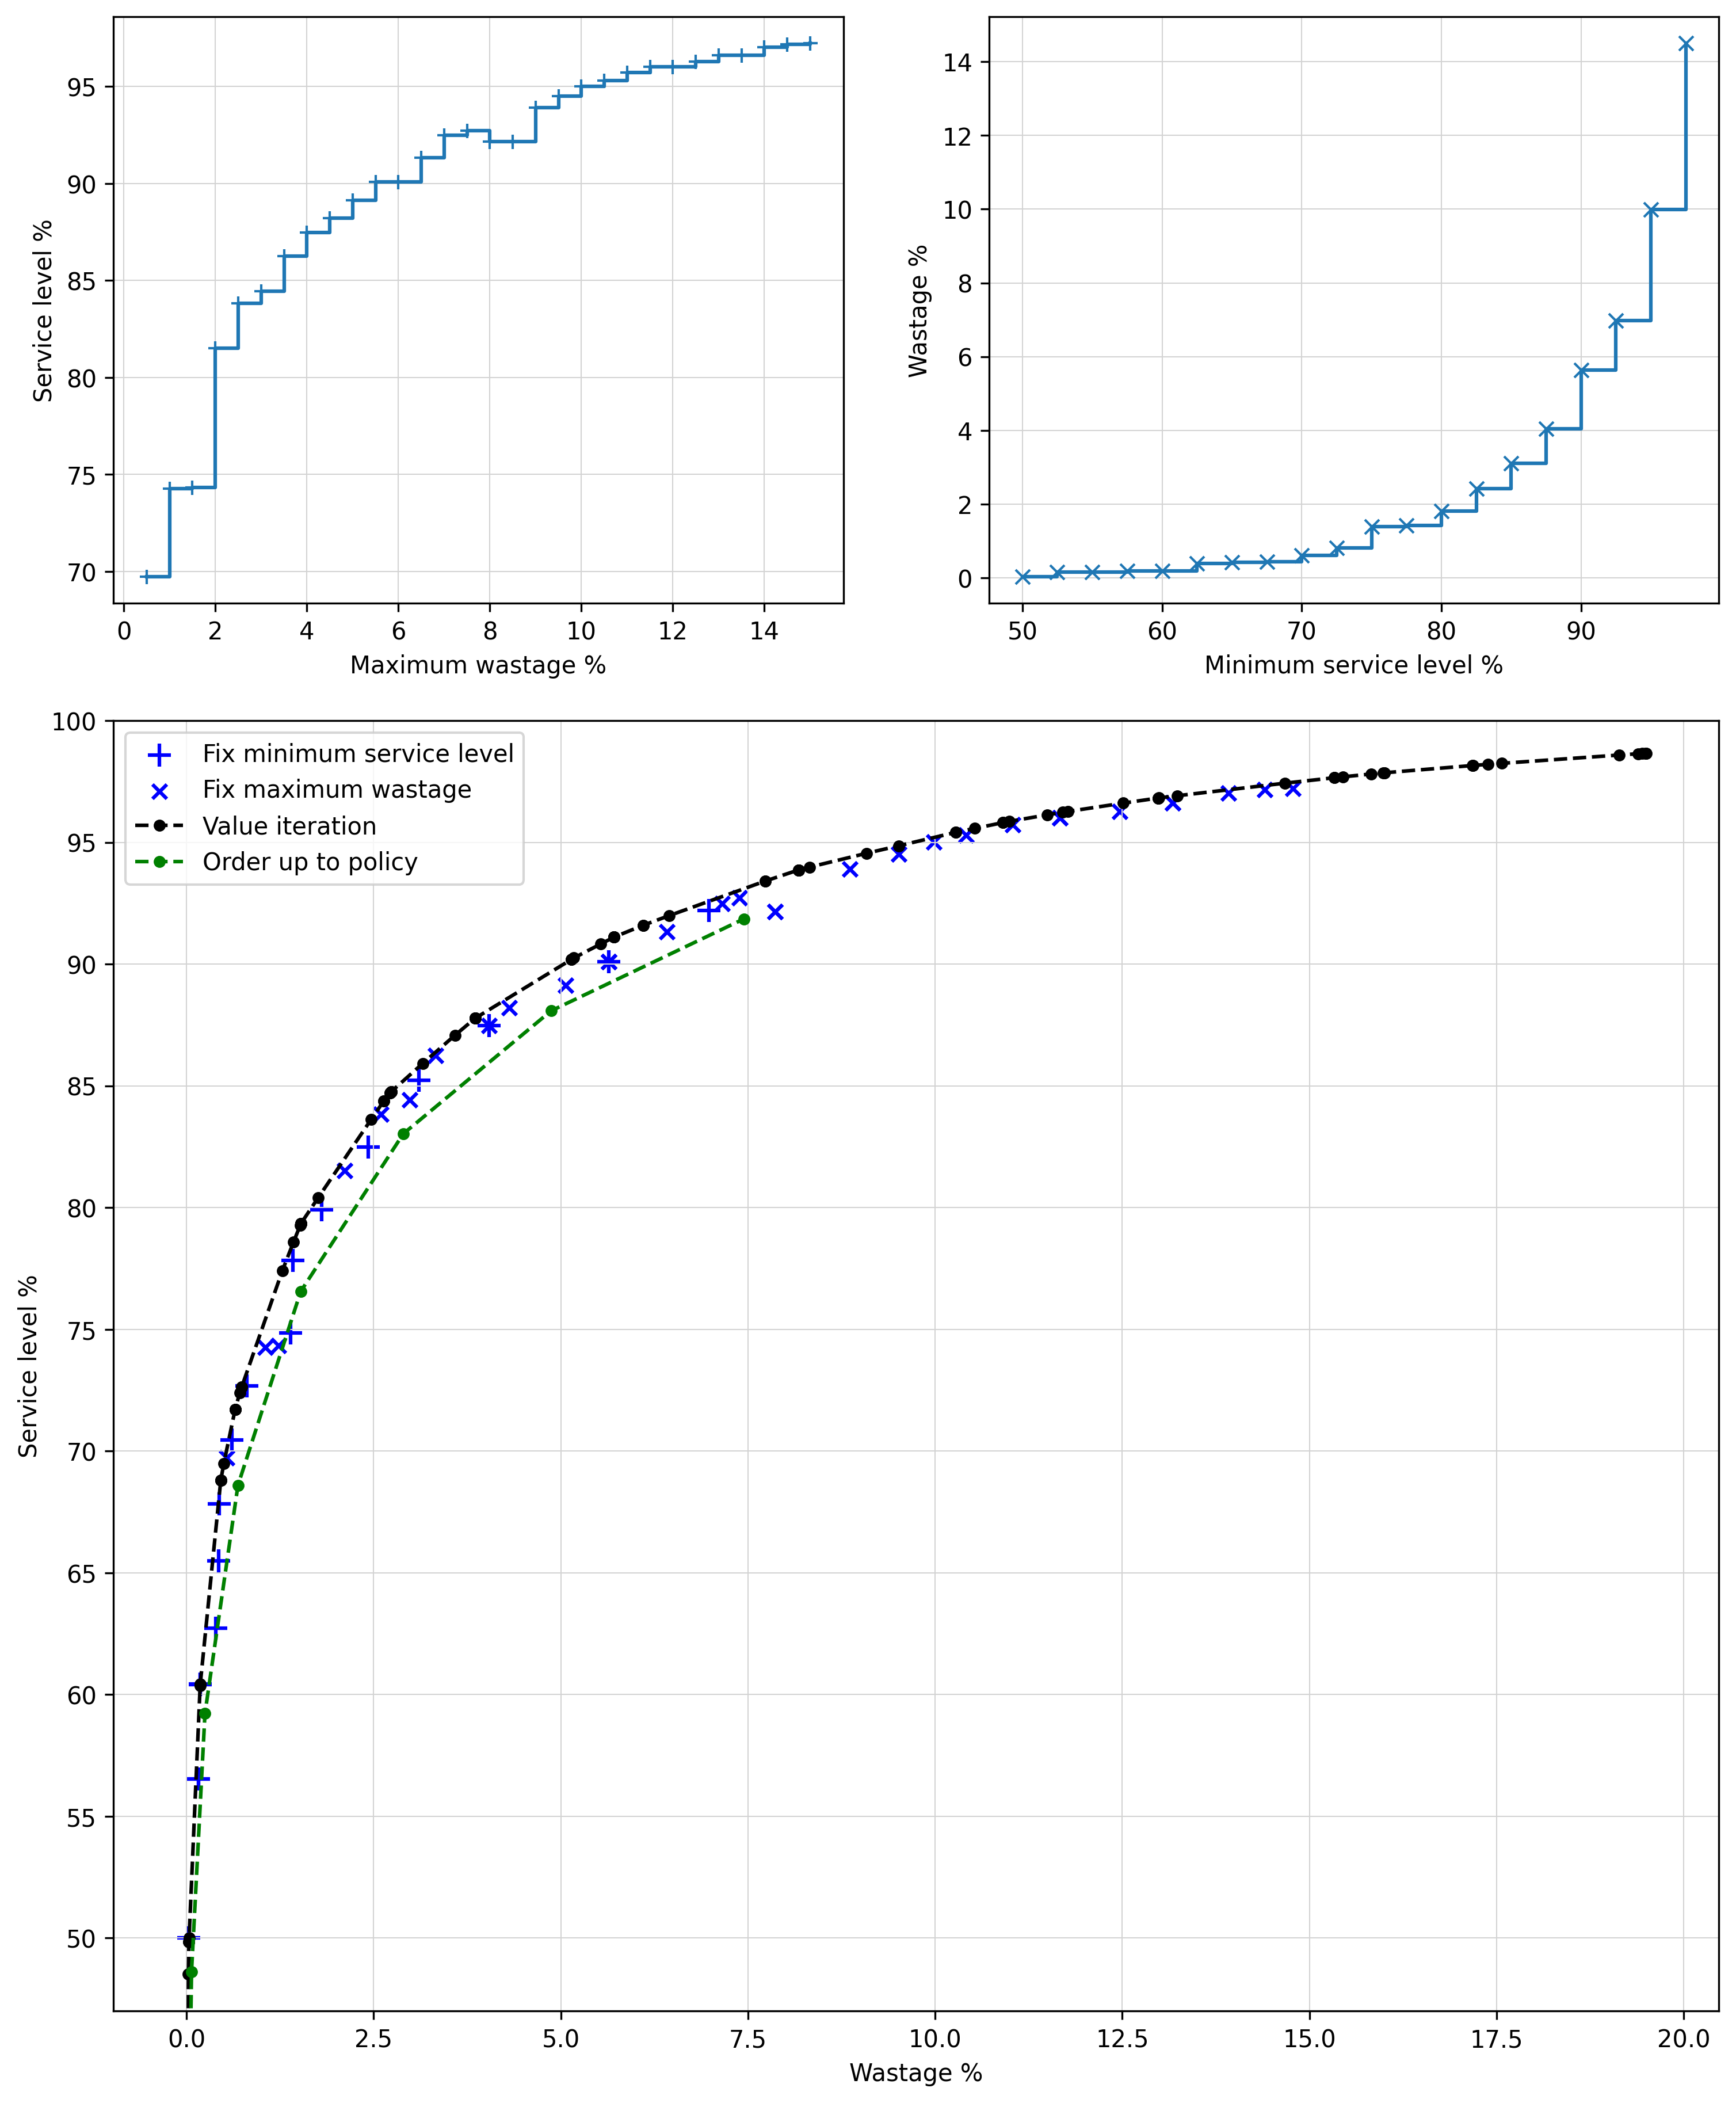

In [13]:
fig = plt.figure(figsize=(12, 15), dpi=300)
gs = GridSpec(3, 2, figure=fig)

# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
ax3.scatter(service_level_limit_df["top_1_wastage_%_mean"][:-2], service_level_limit_df["top_1_service_level_%_mean"][:-2], label="Fix minimum service level", marker="+", s=95, color='blue')
ax3.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Fix maximum wastage", marker="x", color='blue')
ax3.plot(vi_df["wastage_%_mean"], vi_df["service_level_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
ax3.plot(heuristic_df["wastage_%_mean"], heuristic_df["service_level_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_ylabel("Service level %")
ax3.set_xlabel("Wastage %")
ax3.set_ylim(47,100)
ax3.set_yticks(np.arange(50, 105, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()

In [14]:
vi_df

,Unnamed: 0,wastage_cost,shortage_cost,service_level_%_mean,wastage_%_mean,mean_holding_mean,mean_return
0,0,40,3.100000,25.007671,0.000110,0.001862,-1199.108276
1,1,40,3.255981,48.514355,0.025415,0.079789,-1230.942627
2,2,40,3.419811,49.841591,0.032185,0.088235,-1263.109985
3,3,40,3.591884,49.841591,0.032185,0.088235,-1296.780640
4,4,40,3.772615,49.997631,0.034192,0.090011,-1332.031128
...,...,...,...,...,...,...,...
95,95,40,328.684521,98.587463,19.140955,3.906206,-7269.586426
96,96,40,345.222773,98.641251,19.394753,3.943603,-7359.041504
97,97,40,362.593172,98.652534,19.449780,3.950982,-7449.754395
98,98,40,380.837589,98.660797,19.494312,3.957359,-7546.004395


In [15]:
points = np.logspace(np.log10(3.1), np.log10(400), num=50)

In [8]:
points

array([  3.1       ,   3.42323859,   3.78018143,   4.17434289,
         4.60960377,   5.09024951,   5.62101244,   6.20711829,
         6.8543377 ,   7.56904301,   8.35827101,   9.22979221,
        10.19218738,  11.25493198,  12.42848951,  13.72441449,
        15.15546623,  16.73573447,  18.48077808,  20.40777829,
        22.53570781,  24.88551762,  27.4803433 ,  30.3457328 ,
        33.50989792,  37.00399216,  40.86241741,  45.12316263,
        49.82817794,  55.02378761,  60.76114617,  67.09674205,
        74.09295376,  81.81866405,  90.34993812,  99.77077251,
       110.17392213, 121.66181351, 134.3475532 , 148.35604149,
       163.82520203, 180.90733987, 199.77064099, 220.6008282 ,
       243.60298971, 269.00359839, 297.05274158, 328.02658331,
       362.23008341, 400.        ])